## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.7 MB/s eta 0:00:00


## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [4]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [5]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [ ]:
#1.무작위로 1000개 표본 추출을 한다.
#2. 그 추출된 표본을 describe()한다.
#3.전체 데이터 셋에서 TotalPrice에 대해서 describe()해서 평균과 표준편차를 비교한다.


In [7]:
df["TotalPrice"].sample(10).var(ddof=1)

4757.88557777778

In [8]:
df["TotalPrice"].sample(1000).var(ddof=999)
#1000개, 자유도 999로 설정하여 랜럼 추출한 것

3636527.7465723995

In [12]:
sample_data = df["TotalPrice"].sample(1000)
# TotalPrice의 1000개의 무작위 표본을 추출한 후, 이를 'sample_data'라는 변수에 넣어준다.

In [14]:
#추출한 1000개의 sample_data의 표본과 표준 편차를 계산한다.

sample_mean = sample_data.mean()
sample_std = sample_data.std()

print("1000개 sample_data의 표본 평균", sample_mean)
print("1000개 sample_data의 표준 편차", sample_std)

1000개 sample_data의 표본 평균 15.487170000000003
1000개 sample_data의 표준 편차 214.75812327687282


In [15]:
#전체 데이터 셋에서 표본과 표준 편차를 계산
TotalPrice_df = df["TotalPrice"]
TotalPrice_mean = TotalPrice_df.mean()
TotalPrice_std = TotalPrice_df.std()

print("전체 데이터의 평균", TotalPrice_mean)
print("전체 데이터의 표준편차", TotalPrice_std)

전체 데이터의 평균 17.98779487699964
전체 데이터의 표준편차 378.8108235059747


In [ ]:
#차이가 나는 것을 볼 수 있다.
"""
결론,
전체 데이터의 평균은 17.99 (3자리에서 반올림)
표본 평균은 15.49로 전체 데이터에 비해서 작은 것을 확인할 수 있다.

이는 표본이 모집단을 완ㅂ겨하게 대표하지 못하고, 표본 추출로 인해 무작위 변동이 있음.

전체 데이터의 표준편차 378.81
표분 표준편차는 214.76으로
표본의 크기가 작기 때문에 표본 표준편차가 모집단의 표준 편차보다 작을 수 있다.
일반적으로, 표본의 크기가 커질 수록, 표본 표준 편차는 모집단 표준 편차에 가까워진다.


-표본은 모집단의 특성을 완벽하게 반영하지 않을 수 있다.
-표본 통계량은 무작위 샘플링에 따른 변동이 있을 수 있다.
표본 결과를 모집단의 특성으로 일반화할 때 주의해야한다.

<중심극한정리>와의 연관성
중심극한정리 : 무작위로 추출된 큰 표본의 평균이, 근사적으로 정규분포를 따른다는 이론.
표본의 크기가 충분히 크다면 표본 평균의 분포가 모집단 분포에 관계없이 정규분포에 가까워진다는 것을 의미함.
그런 경향을 띤다고 나와있지만, 더 많은 표본을 사용할 경우 확실하게 나타나기 때문에 더 시도해볼 경우 그렇게 나올 것임을 예측할 수 있음.

"""

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [16]:
from scipy import stats


In [ ]:
#1. TotalPrice와 Country 컬럼을 시각화한다.
#2.시각화 해서 가장 많은 두 국가를 찾아본다.
#3. 각 국가들의 평균에 차이가 있는지 검증한다. (각 국가들의 평균 계산)
#4.독립 t검정을 사용한다. (scipy.stats의 ttest_ind 함수 사용, 등분산성은 다르다고 가정)
#5. t통계량과 p-값을 해석하기.
#6. 1종 오류 (남자가 임신) 2종오류(임신했는데 안했다함) , 해당 데이터 셋에 적용하여 설명하기


In [17]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
#여기서 TotalPrice와 Country를 빼내서 따로 만들어야겠다.
new_df = df[['Country', 'TotalPrice']]

#이제 Country열의 빈도수를 확인해본다.
new_df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
"""
주문이 가장 많은 상위 2 국가는
United Kingdom          495478
Germany                   9495
으로 확인이 된다.
"""

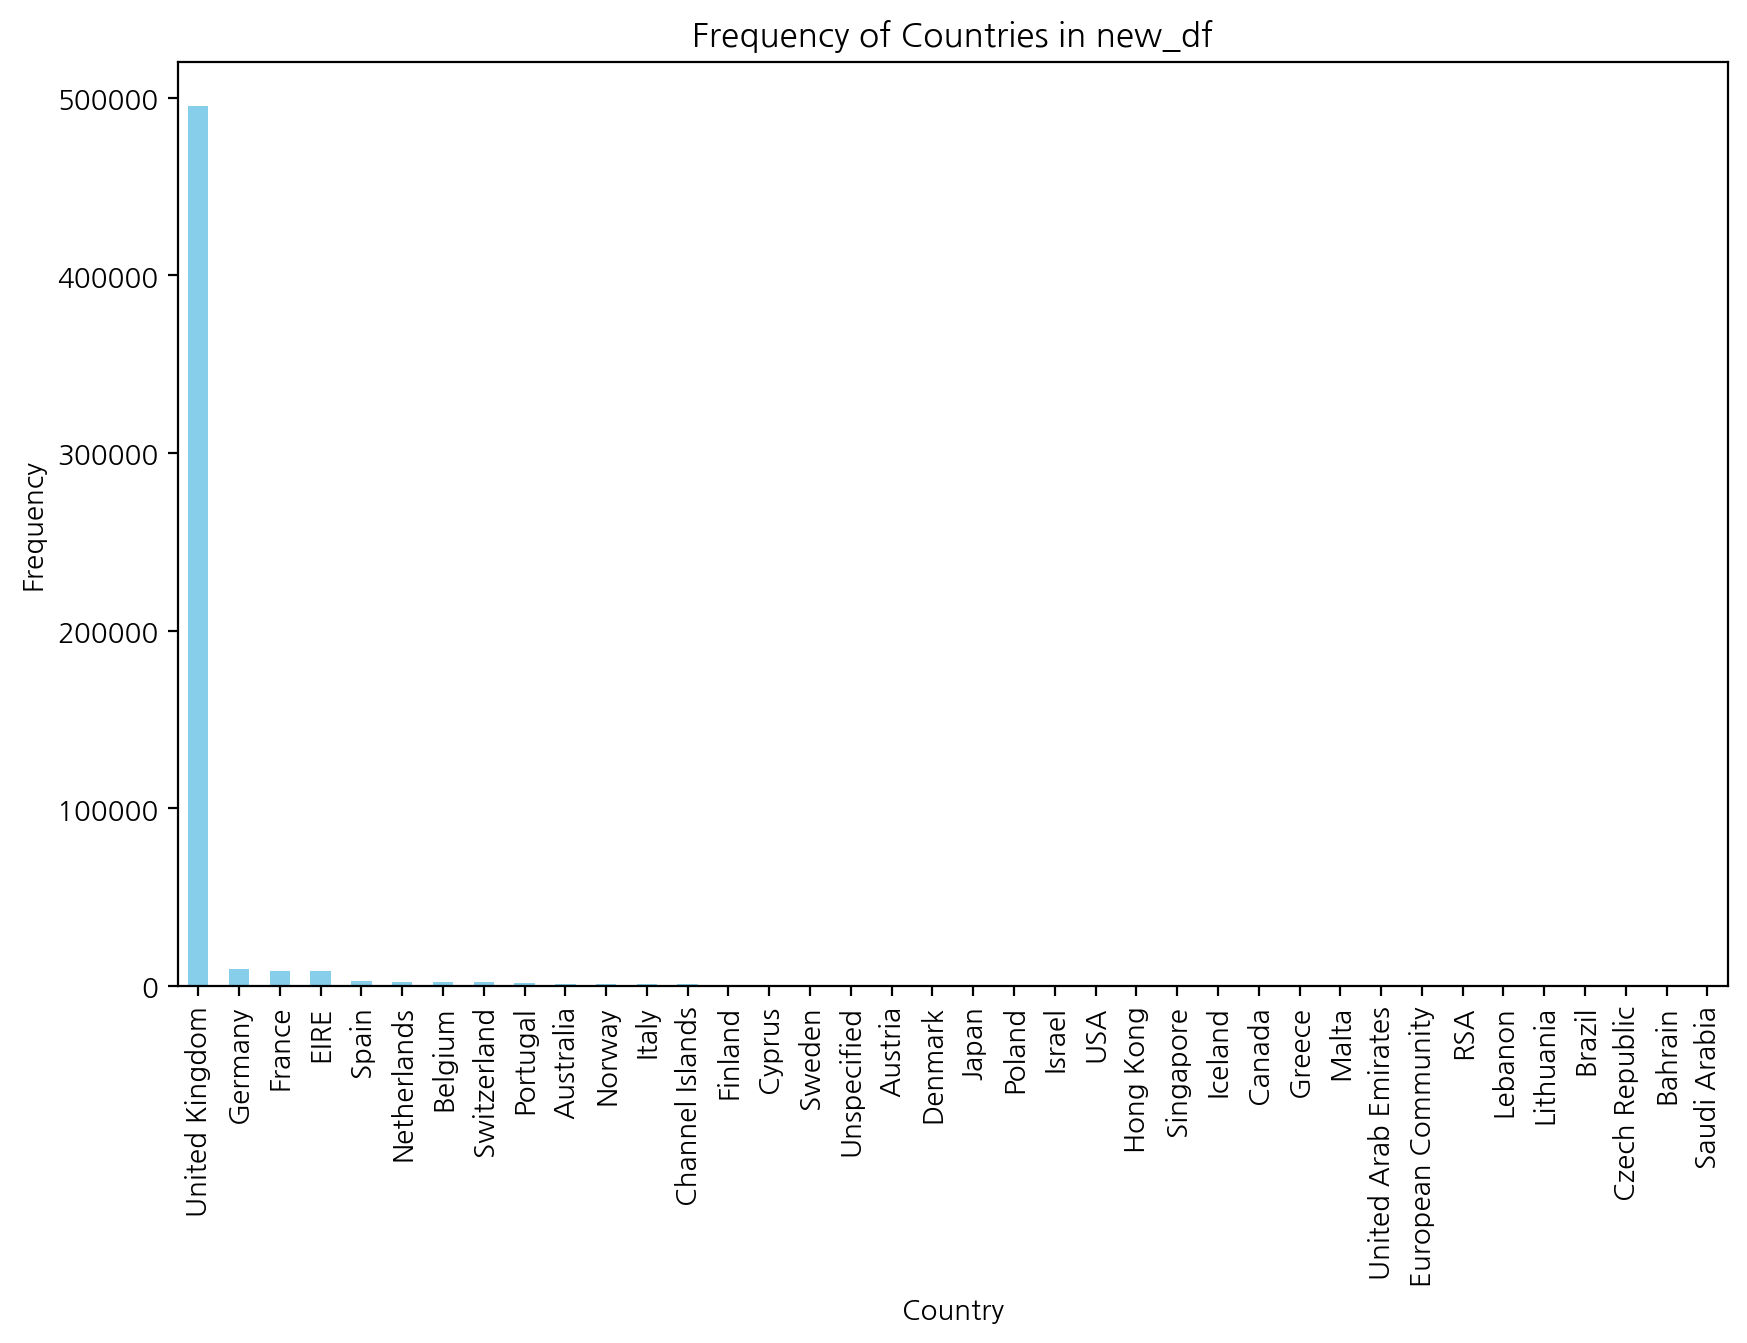

In [24]:
#시각화해본다.
CountryCount = new_df['Country'].value_counts()

plt.figure(figsize=(10,6))
CountryCount.plot(kind='bar', color='skyblue')
plt.title("Frequency of Countries in new_df")
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

In [25]:
#각 국가별로 평균이 어떻게 되는지 계산해본다.
Average_Country = new_df.groupby('Country')['TotalPrice'].mean()

print("각 국가별 평균",Average_Country)

각 국가별 평균 Country
Australia               108.877895
Austria                  25.322494
Bahrain                  28.863158
Belgium                  19.773301
Brazil                   35.737500
Canada                   24.280662
Channel Islands          26.499063
Cyprus                   20.813971
Czech Republic           23.590667
Denmark                  48.247147
EIRE                     32.122599
European Community       21.176230
Finland                  32.124806
France                   23.069288
Germany                  23.348943
Greece                   32.263836
Hong Kong                35.128611
Iceland                  23.681319
Israel                   26.625657
Italy                    21.034259
Japan                    98.716816
Lebanon                  37.641778
Lithuania                47.458857
Malta                    19.728110
Netherlands             120.059696
Norway                   32.378877
Poland                   21.152903
Portugal                 19.333127
RSA

In [27]:
#독립 t검정을 사용하여 앞선 상위 두 국가 United Kingdom , Germany 의 평균의 차이가 유의미한지 검정해본다.
#귀무가설 : 두 그룹의 평균이 같을 것이다!
Average_Country.loc[['United Kingdom', 'Germany']]


Country
United Kingdom    16.525065
Germany           23.348943
Name: TotalPrice, dtype: float64

In [30]:
# (scipy.stats의 ttest_ind 함수 사용, 등분산성은 다르다고 가정)
from scipy.stats import ttest_ind

#United Kingdom의 TotalPrice 데이터를 추출한다./
UK_Total_Price = new_df.loc[new_df['Country'] == 'United Kingdom', 'TotalPrice']

#Germany의 TotalPrice 데이터를 추출한다.
Germany_Total_Price = new_df.loc[new_df['Country'] == 'Germany', 'TotalPrice' ]

In [31]:
#독립 t검정을 수행한다.
T_Statistic, P_Value = ttest_ind(UK_Total_Price, Germany_Total_Price, equal_var=False)

In [35]:
#결과 출력
print("독립 t-검정 결과")
print("T_Statistic", T_Statistic)
print("P-Value", P_Value)
print("P-Value 반올림", P_Value.round(4))

독립 t-검정 결과
T_Statistic -10.046360185819829
P-Value 9.823416115791871e-24
P-Value 반올림 0.0


In [ ]:
#P-Value가 0.05보다 작은 것, 귀무가설을 기각한다...

결과




1.  t-통계량 : -10.046 ,  
2.  P-Value : 9.823 x 10의 -24승 (0에 가까운 매우 작은 값)




In [ ]:
"""
t-통계량은 -10.046이다.
이 값은 두 그룹 간 평균 차이를 표준 오차로 나눈 것을 의미한다.
절댓갓이 클 수록, 두 그룹간의 차이가 크다는 것을 의미한다.
여기서는 절댓값을 입히면 10의 정도기 때문에,
 United Kingdom과 Germany의 TotalPrice 평균 간에 큰 차이가 있다는 것을 나타낸다.

P-Value는 9.823 x 10의 -24승이다.
여기서 귀무가설은 "두 그룹간의 평균이 같다" 인데,
귀무가설이 0.05보다 훨씬 작으므로 기각할 증거가 된다.

"두 그룹간 평균은 다르다"

간단하게 알 수 있는 1종 오류와 2종 오류
-----------------------------------------------------
1종 오류 : 실제 값은 False이나, True라고 예측 하는 것
예시 -> 남자가 임신했다.

2종 오류 : 실제 값은 True이나, False라고 예측하는 것
-> 임신했으나, 임신이 아니라고 함.
-----------------------------------------------------
여기서의 발생할 수 있는 오류는 다음과 같다
1종 오류 : 귀무가설이 두 국가 간 'TotalPrice' 평균이 같다는데, 이를 기각하고
다르다고 결론 지을 경우
2종 오류 : 귀무가설이 두 국가 간 'TotalPrice' 평균이 다르다는데도,
표본에서 유의미한 차이를 찾아내지 못하여 귀무가설을 채택하는 경우.

이러한 오류는 통계적 검정에서 어쩔 수 없이 발생한다.
이를 최소화하기 위해서는 적절한 유의수준과 표본 크기를 선택하는 등의 주의가 필요하다.
"""

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [57]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,WeekEnd,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,주중,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,주중,주중
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,주중,주중
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,주중,주중
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,주중,주중


In [ ]:
#주중과 주말의 데이터를 비교하기 위해서 해야할 작업들을 수행함
#loc로 슬라이싱 하여 "주중", "주말"이렇게 생성함

#분리된 주중과 주말 데이터는 weekday_data와 weekend_data 변수에 저장되어 있다.

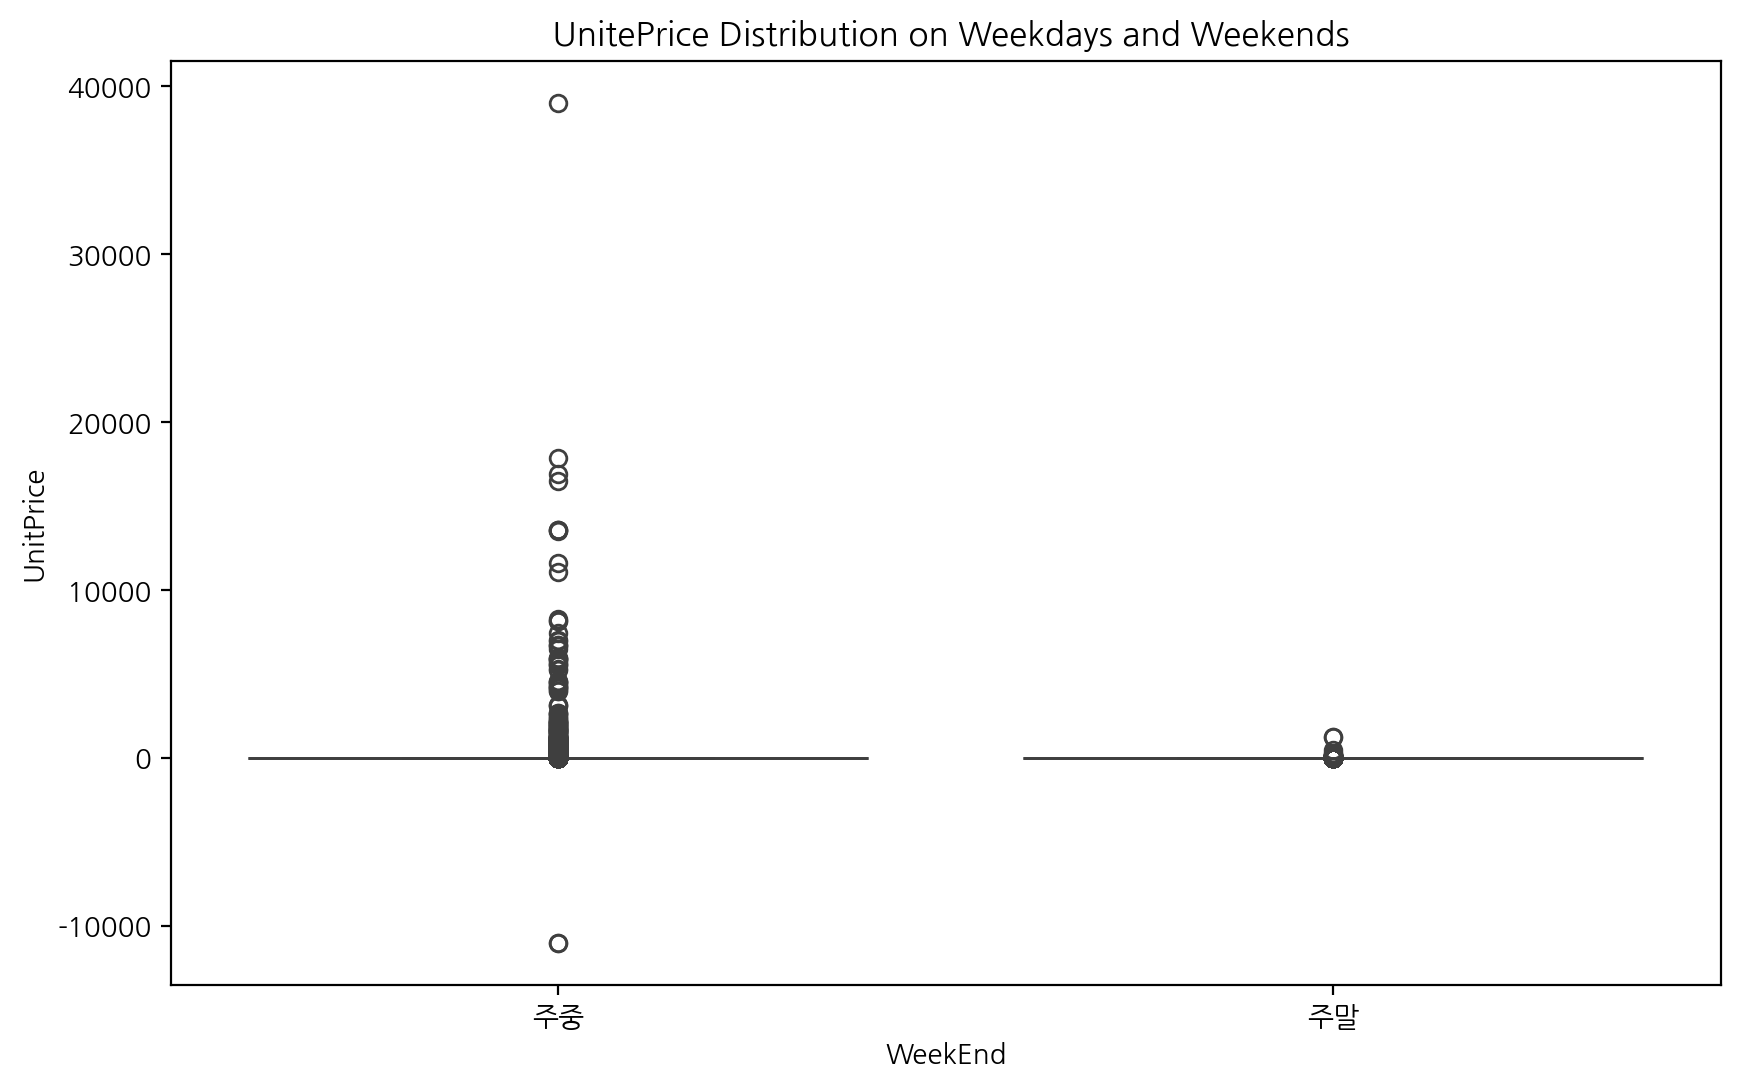

In [38]:
#상자 수염 그래프 그리기

plt.figure(figsize=(10, 6))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title (" UnitePrice Distribution on Weekdays and Weekends")
plt.show()

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'TotalPrice'}>],
       [<Axes: title={'center': 'DayOfWeek'}>, <Axes: >]], dtype=object)

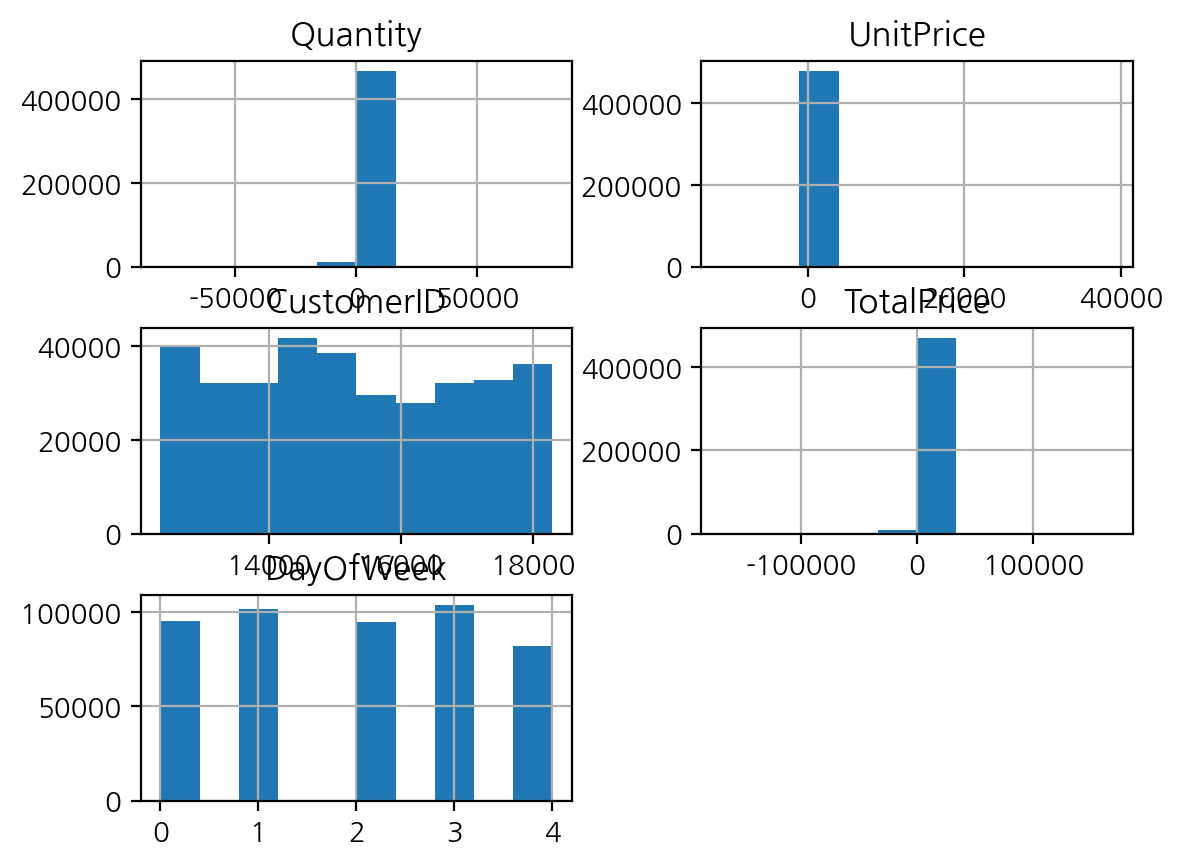

In [48]:
#히스토그램 그리기
weekday_data.hist()

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'TotalPrice'}>],
       [<Axes: title={'center': 'DayOfWeek'}>, <Axes: >]], dtype=object)

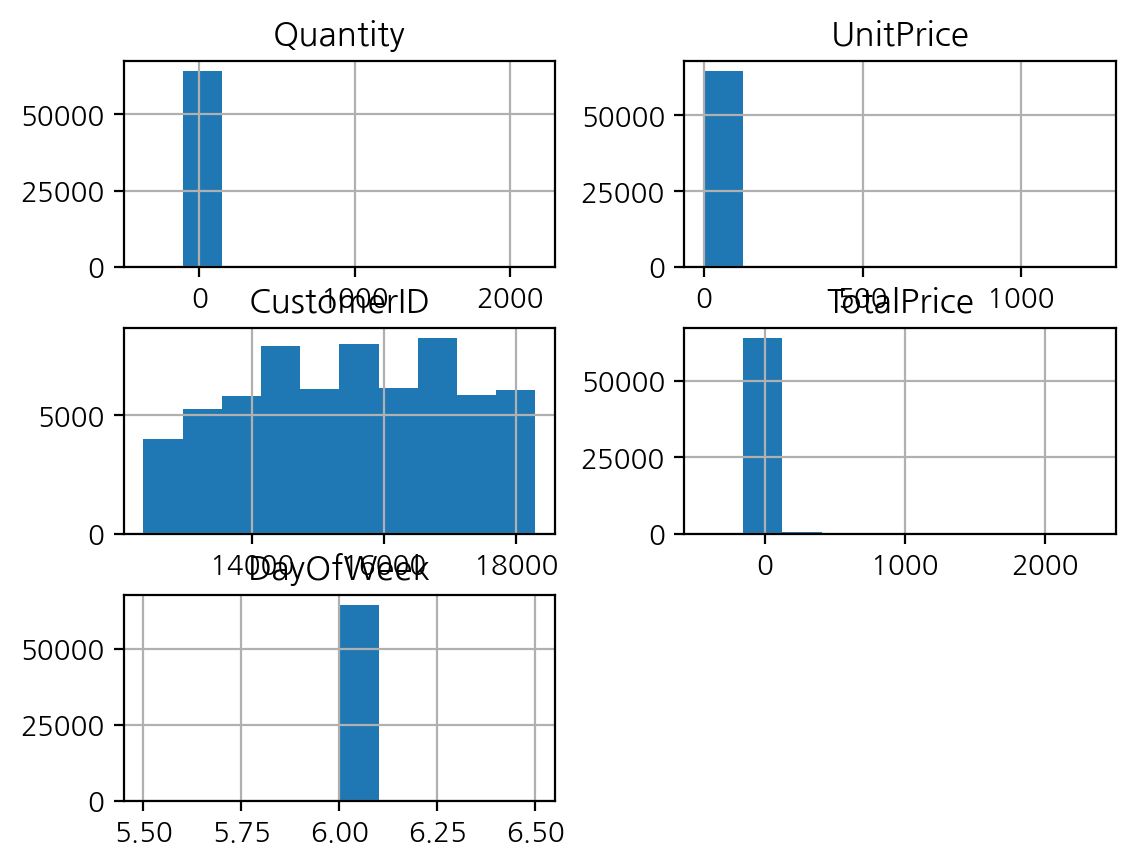

In [52]:
weekend_data.hist()

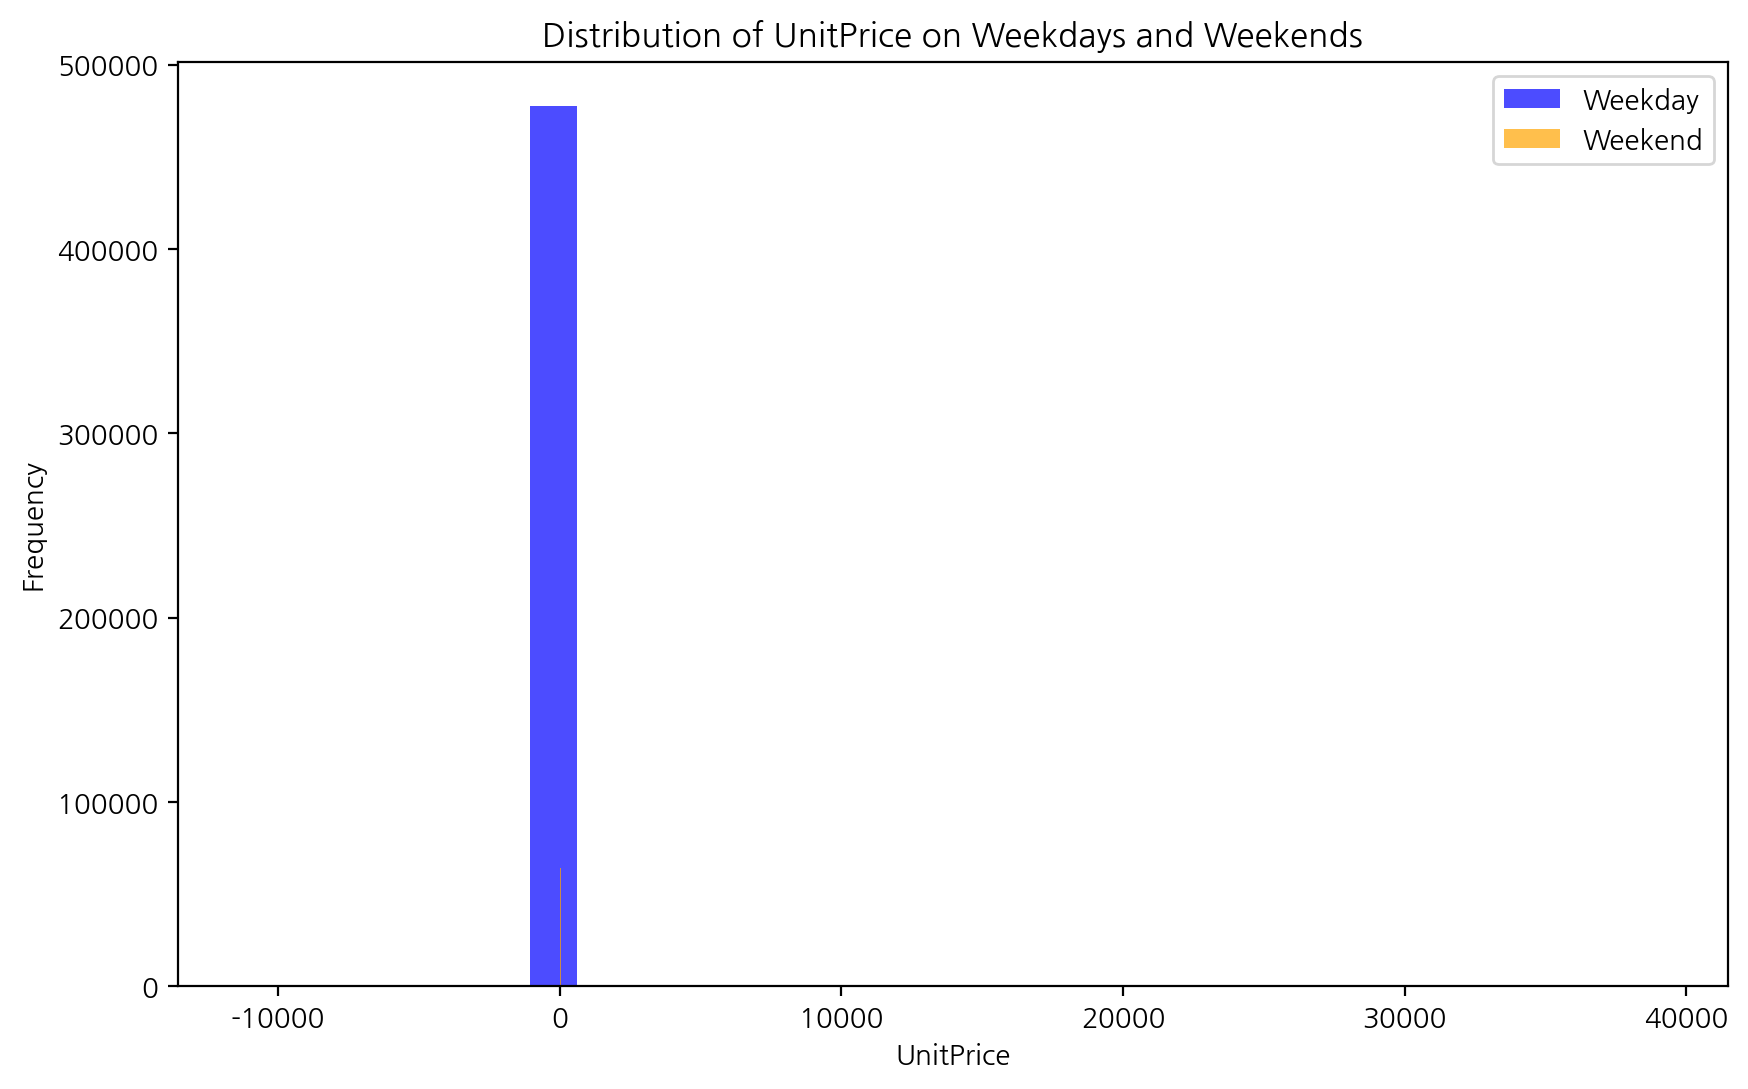

In [53]:
import matplotlib.pyplot as plt

# weekday_data와 weekend_data에서 UnitPrice 열 추출
weekday_unit_price = weekday_data['UnitPrice']
weekend_unit_price = weekend_data['UnitPrice']

# 히스토그램 그리기
plt.figure(figsize=(10, 6))

# 주중(weekday) 히스토그램
plt.hist(weekday_unit_price, bins=30, color='blue', alpha=0.7, label='Weekday')

# 주말(weekend) 히스토그램
plt.hist(weekend_unit_price, bins=30, color='orange', alpha=0.7, label='Weekend')

# 그래프 제목과 레이블 설정
plt.title('Distribution of UnitPrice on Weekdays and Weekends')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()

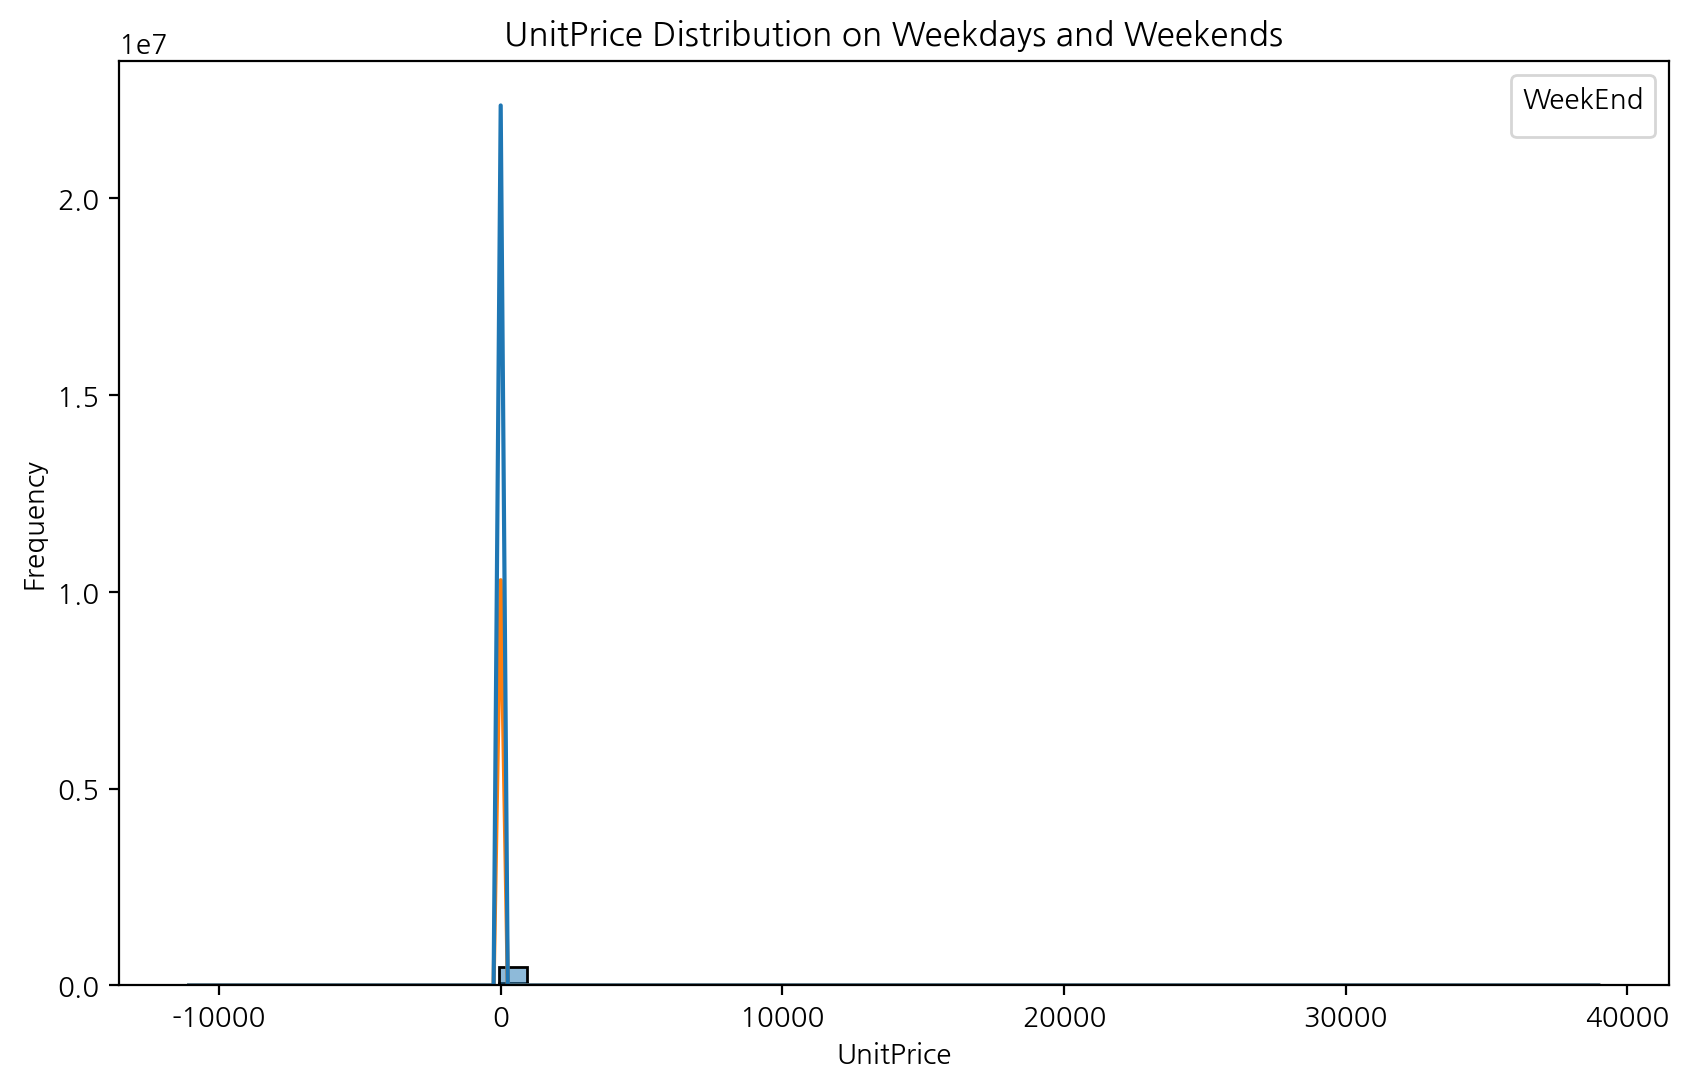

In [ ]:
# df[["MonthlyCharges", "MonthlyCharges_z"]].hist(figsize=(8, 3), bins=50);

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [ ]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [ ]:
from scipy import stats
